# Blood Disease Prediction using Machine Learning
## Multi-class Classification of Diseases based on Blood Analysis

This notebook analyzes blood test results to predict diseases including:
- Healthy
- Diabetes
- Thalassemia (Thalasse)
- Anemia
- Thrombocytopenia (Thromboc)

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning - models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Machine Learning - evaluation
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('Blood_samples_dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nNumber of samples: {len(df)}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (2000, 25)

Number of samples: 2000
Number of features: 24

First few rows:


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,113.285486,214.448537,11.623384,316718.904344,6761.091780,3.614080,31.313811,115.432976,26.593404,36.007151,...,5.384548,119.671260,50.713456,15.077594,35.099245,79.505085,1.121376,0.016647,2.070585,Anemia
1,120.278847,132.223234,11.972096,340263.828051,9716.028417,4.151524,34.444182,89.011001,27.530814,38.075647,...,5.561905,93.207555,36.544058,35.709564,35.296761,46.696522,0.813350,0.016925,1.490463,Anemia
2,118.005852,187.308710,11.903171,407738.606086,8594.021481,5.107349,46.709815,86.148939,23.415382,42.245237,...,4.984699,84.096809,65.068959,23.360817,27.610644,64.148309,0.781885,0.034104,1.781682,Healthy
3,119.725537,232.707251,14.354382,286549.377999,5757.415097,4.952740,49.215201,84.796745,35.548666,33.964360,...,21.833174,105.607936,49.670988,32.149800,20.795985,74.404322,0.893470,0.024006,1.470980,Healthy
4,98.643389,170.653628,14.257739,120719.500141,6121.839348,5.566660,35.353137,85.588008,41.074622,29.235665,...,4.393879,107.340758,53.703274,24.827146,44.216926,86.106335,1.049424,0.028454,0.823993,Thromboc


In [3]:
# Display dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2000 non-null   float64
 1   Cholesterol                                2000 non-null   float64
 2   Hemoglobin                                 2000 non-null   float64
 3   Platelets                                  2000 non-null   float64
 4   White Blood Cells                          2000 non-null   float64
 5   Red Blood Cells                            2000 non-null   float64
 6   Hematocrit                                 2000 non-null   float64
 7   Mean Corpuscular Volume                    2000 non-null   float64
 8   Mean Corpuscular Hemoglobin                2000 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2000 non-null   float64
 10  Ins

In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values per column:
Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                       

In [5]:
# Display basic statistics
print("Statistical Summary of Features:")
df.describe()

Statistical Summary of Features:


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,118.307570,162.351076,13.711327,285871.522497,7486.622185,4.509082,41.754519,88.434858,28.043571,33.056673,...,149.557691,8.938250,100.104017,49.716239,25.102340,24.912716,79.173739,0.906943,0.020048,1.496270
std,35.722970,31.186384,3.195940,80940.107334,1792.634178,0.994835,9.204860,18.941869,6.019542,6.184039,...,91.811214,5.898803,20.651309,9.586116,6.987690,6.828071,15.701911,0.189507,0.007542,0.580052
min,45.290749,72.615102,3.902131,17990.248013,2086.941872,1.692745,16.905425,29.358248,10.696278,11.127849,...,37.271472,1.571868,33.427365,14.590960,5.834818,7.725956,34.873805,0.235632,0.000000,0.050988
25%,96.012275,139.847198,11.395760,237128.702897,6202.168668,3.814150,35.267091,75.872789,23.740775,28.707493,...,92.865841,4.959312,85.844505,43.388118,20.073429,20.141521,68.266016,0.779403,0.014951,1.094476
50%,113.232491,161.218903,13.623465,286294.990230,7364.150706,4.464912,41.453704,87.957962,27.967590,32.979996,...,115.117846,6.090876,99.613526,49.425066,24.629893,24.338108,78.609048,0.901075,0.019651,1.451127
75%,132.385802,183.284096,15.851211,338697.197158,8685.923808,5.127430,48.064007,100.613201,32.052681,37.069235,...,158.329873,11.933865,113.289420,55.901854,29.690016,29.198582,89.169983,1.032692,0.024672,1.862746
max,339.552732,260.701901,24.257356,554803.906401,15494.314603,8.325294,74.783187,170.013990,48.405744,53.621523,...,547.238459,27.140514,189.834252,87.539243,51.996686,50.150947,149.700288,1.649502,0.051105,3.948346


Disease Distribution:
Disease
Healthy     800
Diabetes    500
Anemia      400
Thalasse    200
Thromboc    100
Name: count, dtype: int64

Disease Distribution (%)
Disease
Healthy     40.0
Diabetes    25.0
Anemia      20.0
Thalasse    10.0
Thromboc     5.0
Name: proportion, dtype: float64


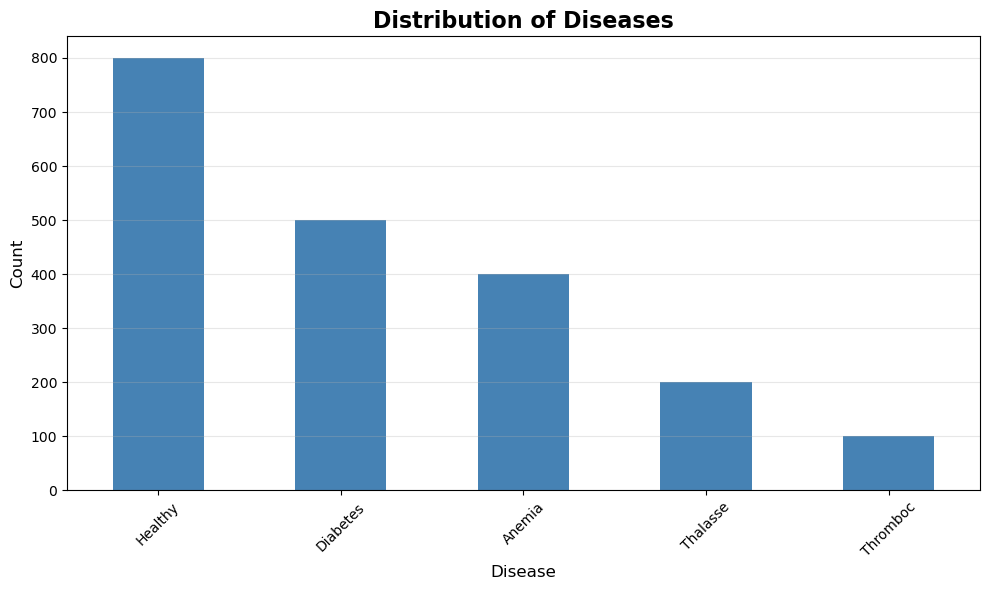

In [6]:
# Check the distribution of diseases (target variable)
print("Disease Distribution:")
print(df['Disease'].value_counts())
print(f"\nDisease Distribution (%)")
print(df['Disease'].value_counts(normalize=True) * 100)

# Visualize disease distribution
plt.figure(figsize=(10, 6))
df['Disease'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribution of Diseases', fontsize=16, fontweight='bold')
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Data Preparation

In [7]:
# Separate features (X) and target (y)
X = df.drop('Disease', axis=1)
y = df['Disease']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns:")
print(X.columns.tolist())

Features shape: (2000, 24)
Target shape: (2000,)

Feature columns:
['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets', 'White Blood Cells', 'Red Blood Cells', 'Hematocrit', 'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin', 'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides', 'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST', 'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein']


In [8]:
# Encode target labels to numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Label Encoding Mapping:")
for i, disease in enumerate(label_encoder.classes_):
    print(f"{disease}: {i}")

Label Encoding Mapping:
Anemia: 0
Diabetes: 1
Healthy: 2
Thalasse: 3
Thromboc: 4


## 4. Split Dataset into Train, Validation, and Test Sets

We'll split the data as follows:
- **Training set**: 70% (for model training)
- **Validation set**: 15% (for hyperparameter tuning and model selection)
- **Test set**: 15% (for final evaluation)

In [9]:
# First split: separate test set (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size=0.15, random_state=42, stratify=y_encoded
)

# Second split: separate train and validation from temp (70% train, 15% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp  # 0.176 of 85% ≈ 15% of total
)

print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set size: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nTotal samples: {len(X_train) + len(X_val) + len(X_test)}")

Training set size: 1400 samples (70.0%)
Validation set size: 300 samples (15.0%)
Test set size: 300 samples (15.0%)

Total samples: 2000


## 5. Model Training and Evaluation

We'll train and compare multiple machine learning algorithms:
1. Random Forest
2. Gradient Boosting
3. Support Vector Machine (SVM)
4. Neural Network (MLP)
5. Logistic Regression

In [10]:
# Dictionary to store models and their results
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=500, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

results = {}

print("Training models...\n")
print("="*80)

Training models...



In [11]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Training {name}...")
    print(f"{'='*80}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Make predictions on validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Store results
    results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'val_f1': val_f1,
        'y_val_pred': y_val_pred
    }
    
    print(f"\n✓ {name} trained successfully!")
    print(f"  Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
    print(f"  Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
    print(f"  Validation F1-Score: {val_f1:.4f}")

print("\n" + "="*80)
print("All models trained successfully!")
print("="*80)


Training Random Forest...

✓ Random Forest trained successfully!
  Training Accuracy: 1.0000 (100.00%)
  Validation Accuracy: 0.9233 (92.33%)
  Validation F1-Score: 0.9221

Training Gradient Boosting...

✓ Gradient Boosting trained successfully!
  Training Accuracy: 1.0000 (100.00%)
  Validation Accuracy: 0.9133 (91.33%)
  Validation F1-Score: 0.9128

Training SVM...

✓ SVM trained successfully!
  Training Accuracy: 0.4329 (43.29%)
  Validation Accuracy: 0.4333 (43.33%)
  Validation F1-Score: 0.2759

Training Neural Network...

✓ Neural Network trained successfully!
  Training Accuracy: 0.2664 (26.64%)
  Validation Accuracy: 0.2700 (27.00%)
  Validation F1-Score: 0.1292

Training Logistic Regression...

✓ Logistic Regression trained successfully!
  Training Accuracy: 0.6814 (68.14%)
  Validation Accuracy: 0.6433 (64.33%)
  Validation F1-Score: 0.6030

All models trained successfully!


## 6. Model Comparison

In [12]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Training Accuracy': [results[m]['train_accuracy'] for m in results.keys()],
    'Validation Accuracy': [results[m]['val_accuracy'] for m in results.keys()],
    'Validation F1-Score': [results[m]['val_f1'] for m in results.keys()]
})

# Sort by validation accuracy
comparison_df = comparison_df.sort_values('Validation Accuracy', ascending=False)

print("\nModel Performance Comparison:")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


Model Performance Comparison:
              Model  Training Accuracy  Validation Accuracy  Validation F1-Score
      Random Forest           1.000000             0.923333             0.922051
  Gradient Boosting           1.000000             0.913333             0.912837
Logistic Regression           0.681429             0.643333             0.602981
                SVM           0.432857             0.433333             0.275944
     Neural Network           0.266429             0.270000             0.129175


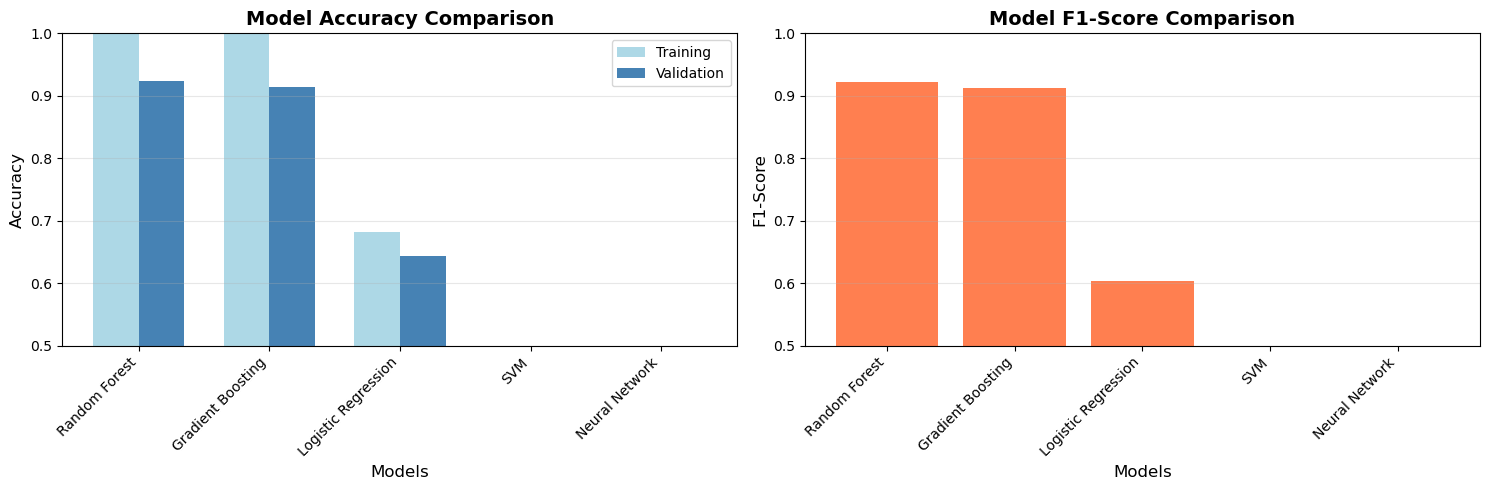

In [13]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy comparison
x = np.arange(len(comparison_df))
width = 0.35

axes[0].bar(x - width/2, comparison_df['Training Accuracy'], width, label='Training', color='lightblue')
axes[0].bar(x + width/2, comparison_df['Validation Accuracy'], width, label='Validation', color='steelblue')
axes[0].set_xlabel('Models', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.5, 1.0])

# Plot 2: F1-Score comparison
axes[1].bar(comparison_df['Model'], comparison_df['Validation F1-Score'], color='coral')
axes[1].set_xlabel('Models', fontsize=12)
axes[1].set_ylabel('F1-Score', fontsize=12)
axes[1].set_title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0.5, 1.0])

plt.tight_layout()
plt.show()

## 7. Select Best Model and Evaluate on Test Set

In [14]:
# Select the best model based on validation accuracy
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

print(f"\n{'='*80}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*80}")
print(f"Validation Accuracy: {results[best_model_name]['val_accuracy']:.4f} ({results[best_model_name]['val_accuracy']*100:.2f}%)")
print(f"Validation F1-Score: {results[best_model_name]['val_f1']:.4f}")


BEST MODEL: Random Forest
Validation Accuracy: 0.9233 (92.33%)
Validation F1-Score: 0.9221


In [15]:
# Evaluate on test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

print(f"\n{'='*80}")
print(f"FINAL TEST SET RESULTS")
print(f"{'='*80}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"{'='*80}")


FINAL TEST SET RESULTS
Test Accuracy: 0.8900 (89.00%)
Test Precision: 0.8908
Test Recall: 0.8900
Test F1-Score: 0.8890


## 8. Detailed Classification Report

In [16]:
# Generate classification report
print("\nDetailed Classification Report on Test Set:")
print("="*80)
print(classification_report(
    y_test, 
    y_test_pred, 
    target_names=label_encoder.classes_,
    digits=4
))
print("="*80)


Detailed Classification Report on Test Set:
              precision    recall  f1-score   support

      Anemia     0.7812    0.8333    0.8065        60
    Diabetes     1.0000    0.9600    0.9796        75
     Healthy     0.9106    0.9333    0.9218       120
    Thalasse     0.7917    0.6333    0.7037        30
    Thromboc     0.8235    0.9333    0.8750        15

    accuracy                         0.8900       300
   macro avg     0.8614    0.8587    0.8573       300
weighted avg     0.8908    0.8900    0.8890       300



## 9. Confusion Matrix Visualization

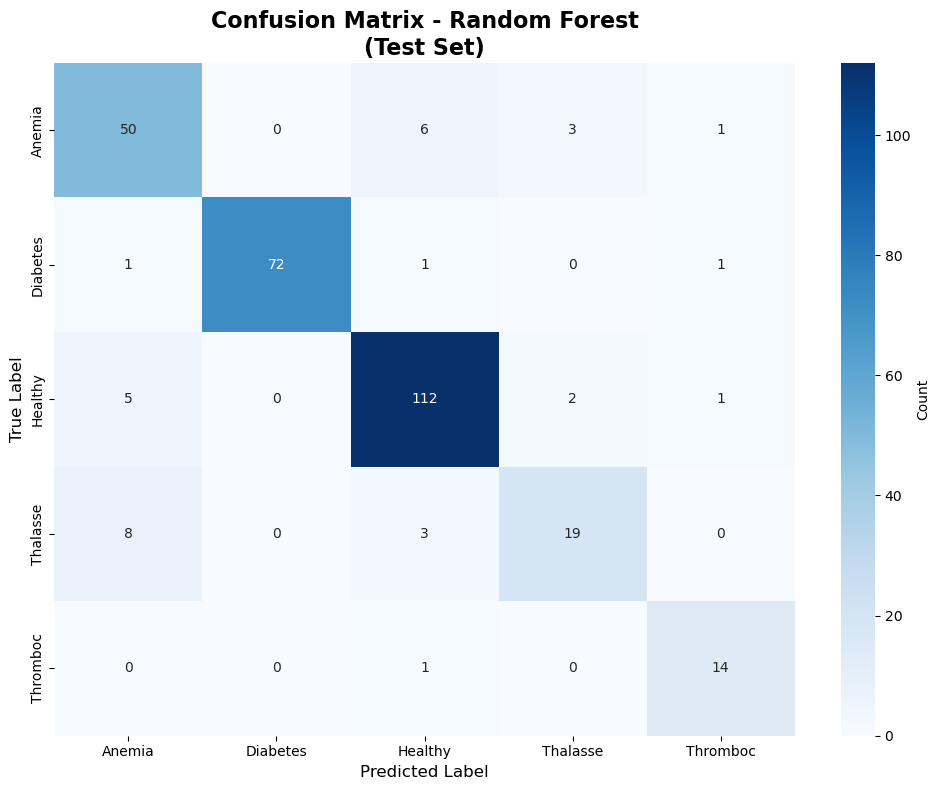


Per-Class Accuracy:
Anemia              : 0.8333 (83.33%)
Diabetes            : 0.9600 (96.00%)
Healthy             : 0.9333 (93.33%)
Thalasse            : 0.6333 (63.33%)
Thromboc            : 0.9333 (93.33%)


In [17]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    cbar_kws={'label': 'Count'}
)
plt.title(f'Confusion Matrix - {best_model_name}\n(Test Set)', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate and display per-class accuracy
print("\nPer-Class Accuracy:")
print("="*80)
for i, disease in enumerate(label_encoder.classes_):
    class_accuracy = cm[i, i] / cm[i].sum() if cm[i].sum() > 0 else 0
    print(f"{disease:20s}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")
print("="*80)

## 10. Feature Importance Analysis

(Only available for tree-based models like Random Forest and Gradient Boosting)


Top 10 Most Important Features:
                    Feature  Importance
                      HbA1c    0.168825
              Triglycerides    0.167136
                    Insulin    0.107477
            Red Blood Cells    0.065020
Mean Corpuscular Hemoglobin    0.061649
                  Platelets    0.058696
                 Hematocrit    0.055995
                 Hemoglobin    0.050231
                        BMI    0.038774
                    Glucose    0.030251


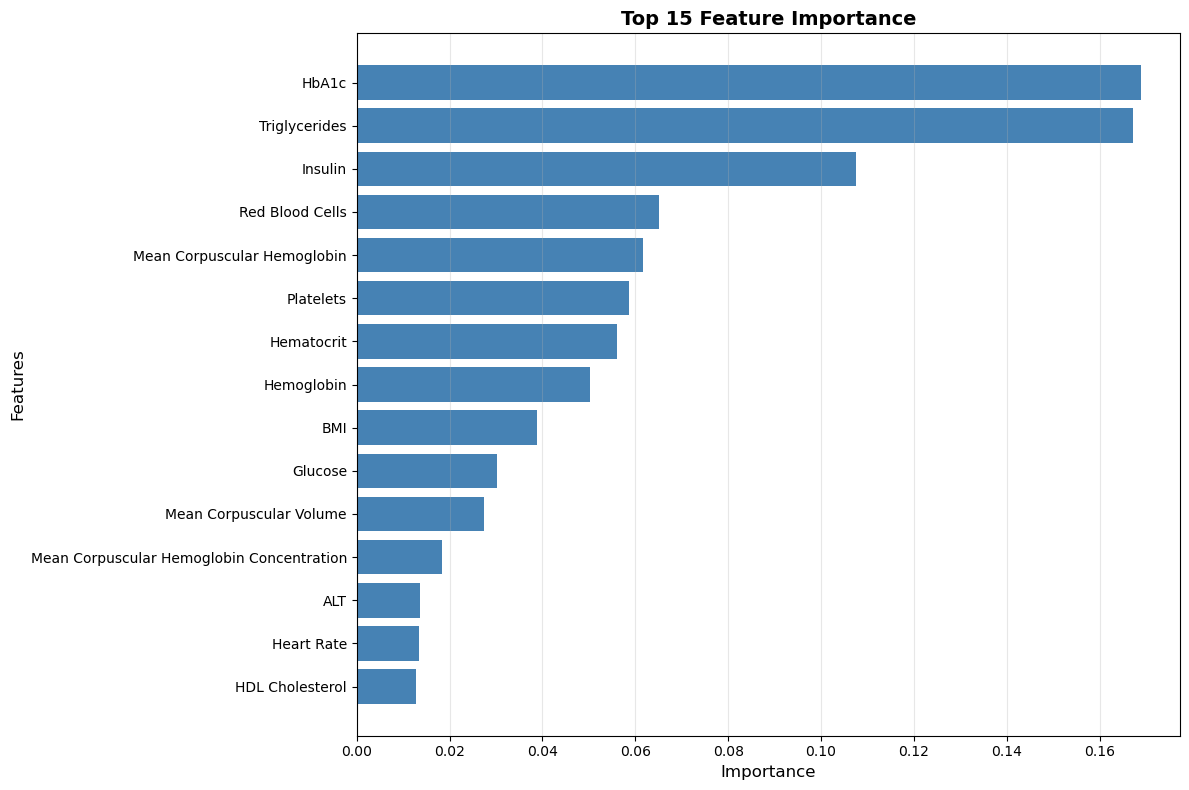

In [18]:
# Check if the best model has feature importance
if hasattr(best_model, 'feature_importances_'):
    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print("="*80)
    print(feature_importance.head(10).to_string(index=False))
    print("="*80)
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance['Feature'].head(15), feature_importance['Importance'].head(15), color='steelblue')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Top 15 Feature Importance', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(f"\nFeature importance is not available for {best_model_name}")

## 11. Make Predictions on New Data

Example of how to use the trained model for predictions

In [19]:
# Example: Take a few samples from test set for demonstration
sample_indices = [0, 1, 2, 3, 4]
sample_data = X_test.iloc[sample_indices]
sample_true_labels = y_test[sample_indices]

# Make predictions
sample_predictions = best_model.predict(sample_data)

# Display results
print("\nSample Predictions:")
print("="*80)
for i, (true_label, pred_label) in enumerate(zip(sample_true_labels, sample_predictions)):
    true_disease = label_encoder.inverse_transform([true_label])[0]
    pred_disease = label_encoder.inverse_transform([pred_label])[0]
    match = "✓" if true_label == pred_label else "✗"
    print(f"Sample {i+1}: True = {true_disease:15s} | Predicted = {pred_disease:15s} {match}")
print("="*80)


Sample Predictions:
Sample 1: True = Healthy         | Predicted = Healthy         ✓
Sample 2: True = Thalasse        | Predicted = Anemia          ✗
Sample 3: True = Healthy         | Predicted = Healthy         ✓
Sample 4: True = Healthy         | Predicted = Healthy         ✓
Sample 5: True = Anemia          | Predicted = Anemia          ✓


## 12. Summary and Conclusions

In [20]:
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"\nDataset: Blood Disease Prediction")
print(f"Total Samples: {len(df)}")
print(f"Number of Features: {X.shape[1]}")
print(f"Number of Classes: {len(label_encoder.classes_)}")
print(f"Classes: {', '.join(label_encoder.classes_)}")
print(f"\nData Split:")
print(f"  - Training: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"  - Validation: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"  - Test: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test F1-Score: {test_f1:.4f}")
print("="*80)
print("\n✓ Analysis completed successfully!")
print("\nNext steps:")
print("1. Fine-tune the best model with hyperparameter optimization")
print("2. Collect more data if needed to improve performance")
print("3. Deploy the model for real-world predictions")
print("="*80)


SUMMARY

Dataset: Blood Disease Prediction
Total Samples: 2000
Number of Features: 24
Number of Classes: 5
Classes: Anemia, Diabetes, Healthy, Thalasse, Thromboc

Data Split:
  - Training: 1400 samples (70.0%)
  - Validation: 300 samples (15.0%)
  - Test: 300 samples (15.0%)

Best Model: Random Forest
Test Accuracy: 0.8900 (89.00%)
Test F1-Score: 0.8890

✓ Analysis completed successfully!

Next steps:
1. Fine-tune the best model with hyperparameter optimization
2. Collect more data if needed to improve performance
3. Deploy the model for real-world predictions


## 13. Save the Trained Model for Production Use

In [21]:
import joblib
import os

# Create models directory if it doesn't exist
models_dir = '../python-backend/models'
os.makedirs(models_dir, exist_ok=True)

# Save the trained Random Forest model
model_path = os.path.join(models_dir, 'random_forest_model.pkl')
joblib.dump(best_model, model_path)
print(f"✓ Model saved to: {model_path}")

# Save the label encoder
encoder_path = os.path.join(models_dir, 'label_encoder.pkl')
joblib.dump(label_encoder, encoder_path)
print(f"✓ Label encoder saved to: {encoder_path}")

# Save feature names for reference
feature_names_path = os.path.join(models_dir, 'feature_names.pkl')
joblib.dump(X.columns.tolist(), feature_names_path)
print(f"✓ Feature names saved to: {feature_names_path}")

print("\n" + "="*80)
print("MODEL EXPORT COMPLETE")
print("="*80)
print(f"\nModel Type: {type(best_model).__name__}")
print(f"Number of Features: {len(X.columns)}")
print(f"Number of Classes: {len(label_encoder.classes_)}")
print(f"Classes: {', '.join(label_encoder.classes_)}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("\nThese files are ready to be used in the Flask API backend!")
print("="*80)

✓ Model saved to: ../python-backend/models/random_forest_model.pkl
✓ Label encoder saved to: ../python-backend/models/label_encoder.pkl
✓ Feature names saved to: ../python-backend/models/feature_names.pkl

MODEL EXPORT COMPLETE

Model Type: RandomForestClassifier
Number of Features: 24
Number of Classes: 5
Classes: Anemia, Diabetes, Healthy, Thalasse, Thromboc
Test Accuracy: 0.8900 (89.00%)

These files are ready to be used in the Flask API backend!
